In [33]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from collections import OrderedDict

import seaborn as sns  # необходима версия не ниже 0.9.0

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [3]:
churn_data_df = pd.read_csv('orange_small_churn_data.txt', sep=',')
labels_df = pd.read_csv('orange_small_churn_labels.txt', sep=',', names=['label'])
labels_df['target'] = labels_df.label == 1
labels_df = labels_df.drop(['label'], axis=1)
print churn_data_df.shape

(40000, 230)


In [4]:
churn_data_df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [122]:
churn_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,570.0,1.100351e+01,3.495279e+01,0.00,0.000,0.00,16.00,536.00
Var2,1006.0,4.970179e-03,1.576417e-01,0.00,0.000,0.00,0.00,5.00
Var3,1005.0,4.293284e+02,4.470406e+03,0.00,0.000,0.00,0.00,130668.00
Var4,1275.0,1.482353e-01,1.396054e+00,0.00,0.000,0.00,0.00,27.00
Var5,1165.0,2.490555e+05,6.762021e+05,0.00,0.000,0.00,117215.00,6048550.00
Var6,35565.0,1.319915e+03,2.609956e+03,0.00,518.000,854.00,1435.00,131761.00
Var7,35560.0,6.792126e+00,6.287285e+00,0.00,0.000,7.00,7.00,35.00
Var8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var9,570.0,4.748772e+01,1.471378e+02,0.00,4.000,20.00,46.00,2300.00
Var10,1165.0,3.813466e+05,9.353348e+05,0.00,0.000,0.00,241974.00,12325590.00


In [5]:
columns = churn_data_df.columns
columns_numbers = churn_data_df.columns[:190]
columns_cat = churn_data_df.columns[-40:]

# удаляем признаки не содержащине данных 
empty_columns = []
for col_name in columns:
    if len(churn_data_df[col_name].value_counts()) == 0:
       empty_columns.append(col_name) 
    
columns_numbers = [x for x in columns_numbers if x not in empty_columns]
columns_cat = [x for x in columns_cat if x not in empty_columns]

data_numbers = churn_data_df[columns_numbers]
data_cat = churn_data_df[columns_cat]
target = labels_df.target

data_numbers_with_target = pd.concat([data_numbers, target], axis=1)
data_cat_with_target = pd.concat([data_cat, target], axis=1)

2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
target.value_counts(normalize=1)

False    0.9256
True     0.0744
Name: target, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [7]:
# Корреляция между целевой переменной и числовыми признаками
r_features_correlation = {}

def pointbiserialr(x, y):
    y = y[~np.isnan(x)]
    x = x[~np.isnan(x)] 
    
    if len(x) == 0:
        return 0.

    m0 = x[y == 0].mean()
    m1 = x[y == 1].mean()

    n = float(len(x))
    n0 = len(x[y == 0])
    n1 = len(x[y == 1])
    std = x.std()
    
    if std == 0:
        return 0.

    r = (m1 - m0) * np.sqrt(n1*n0/(n**2)) / std
    return r


for col_name in columns_numbers:
    r_features_correlation[col_name] = pointbiserialr(data_numbers[col_name].values, target.values)

In [26]:
# Посмотрим на top 20 коррелированных переменных, заодно проверим методом из scipy
ordered = OrderedDict(sorted(r_features_correlation.items(), key=lambda t: abs(t[1]), reverse=True))
list(ordered.items())[:20]
top_r_corr = list(ordered)[:20]  # top 20 
bottom_r_corr = list(ordered)[-10:] # 10 самых плохих 

print "top 20"
for col_name in top_r_corr:
    x = data_numbers[data_numbers[col_name].notnull()][col_name].values
    y = target[data_numbers[col_name].notnull()].values
    r, p_value = stats.pointbiserialr(x, y)
    print "\t{: <7} {: <20} {: <20} {: <20}".format(col_name, ordered[col_name], r, p_value)
    
print "\nbottom 20"

for col_name in bottom_r_corr:
    x = data_numbers[data_numbers[col_name].notnull()][col_name].values
    y = target[data_numbers[col_name].notnull()].values
    r, p_value = stats.pointbiserialr(x, y)
    print "\t{: <7} {: <20} {: <20} {: <20}".format(col_name, ordered[col_name], r, p_value)

top 20
	Var168  -0.135304811832      -0.135304811832      0.00120299293743    
	Var189  -0.122501138631      -0.122501138631      3.94138083647e-57   
	Var131  0.0962019001969      0.0962019001969      0.0216143815972     
	Var188  0.0952381437097      0.0952381437097      0.00249591560082    
	Var53   0.0790454930096      0.0790454930096      0.0592957138821     
	Var111  0.0769563877723      0.0769563877723      0.021675378743      
	Var19   0.0742021272673      0.0742021272673      0.00803485143691    
	Var7    -0.0724367807067     -0.0724367807067     1.39030958585e-42   
	Var73   -0.0695502817415     -0.0695502817415     4.37343825383e-44   
	Var177  0.0601602956015      0.0601602956015      0.0564571705019     
	Var92   -0.0597228025492     -0.0597228025492     0.483340265424      
	Var113  0.0561138084504      0.0561138084504      2.8636456664e-29    
	Var126  0.0548410903452      0.0548410903452      1.07570766867e-20   
	Var144  -0.0534399473252     -0.0534399473252     6.4415

In [36]:
# Корреляция между целевой переменной и категориальными признаками

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association. """
    
    if confusion_matrix.shape[0] == 1:
        return 0.
    
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

c_features_correlation = {}    

for col_name in columns_cat:
    x = data_cat[col_name].fillna('no_data').values
    y = target.values
    confusion_matrix = pd.crosstab(x, y)
    c_features_correlation[col_name] = cramers_corrected_stat(np.array(confusion_matrix))
    
ordered = OrderedDict(sorted(c_features_correlation.items(), key=lambda t: abs(t[1]), reverse=True))
top_c_corr = list(ordered)[:20]
list(ordered.items())[:20]    

[('Var217', 0.52986260512218375),
 ('Var200', 0.52599126441625521),
 ('Var214', 0.52599126441625521),
 ('Var199', 0.40783117717402118),
 ('Var202', 0.36343287292663429),
 ('Var222', 0.29259328641845067),
 ('Var220', 0.29259328641845067),
 ('Var198', 0.29259328641845067),
 ('Var216', 0.22894003457385523),
 ('Var192', 0.15124744994612724),
 ('Var218', 0.10175630348119198),
 ('Var212', 0.087020127729270841),
 ('Var206', 0.085054492582019067),
 ('Var197', 0.082120161041182901),
 ('Var228', 0.07557545823201052),
 ('Var205', 0.072557849012233999),
 ('Var193', 0.070206596248984107),
 ('Var204', 0.069023300553773259),
 ('Var229', 0.06248474692828572),
 ('Var207', 0.058275604638053723)]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

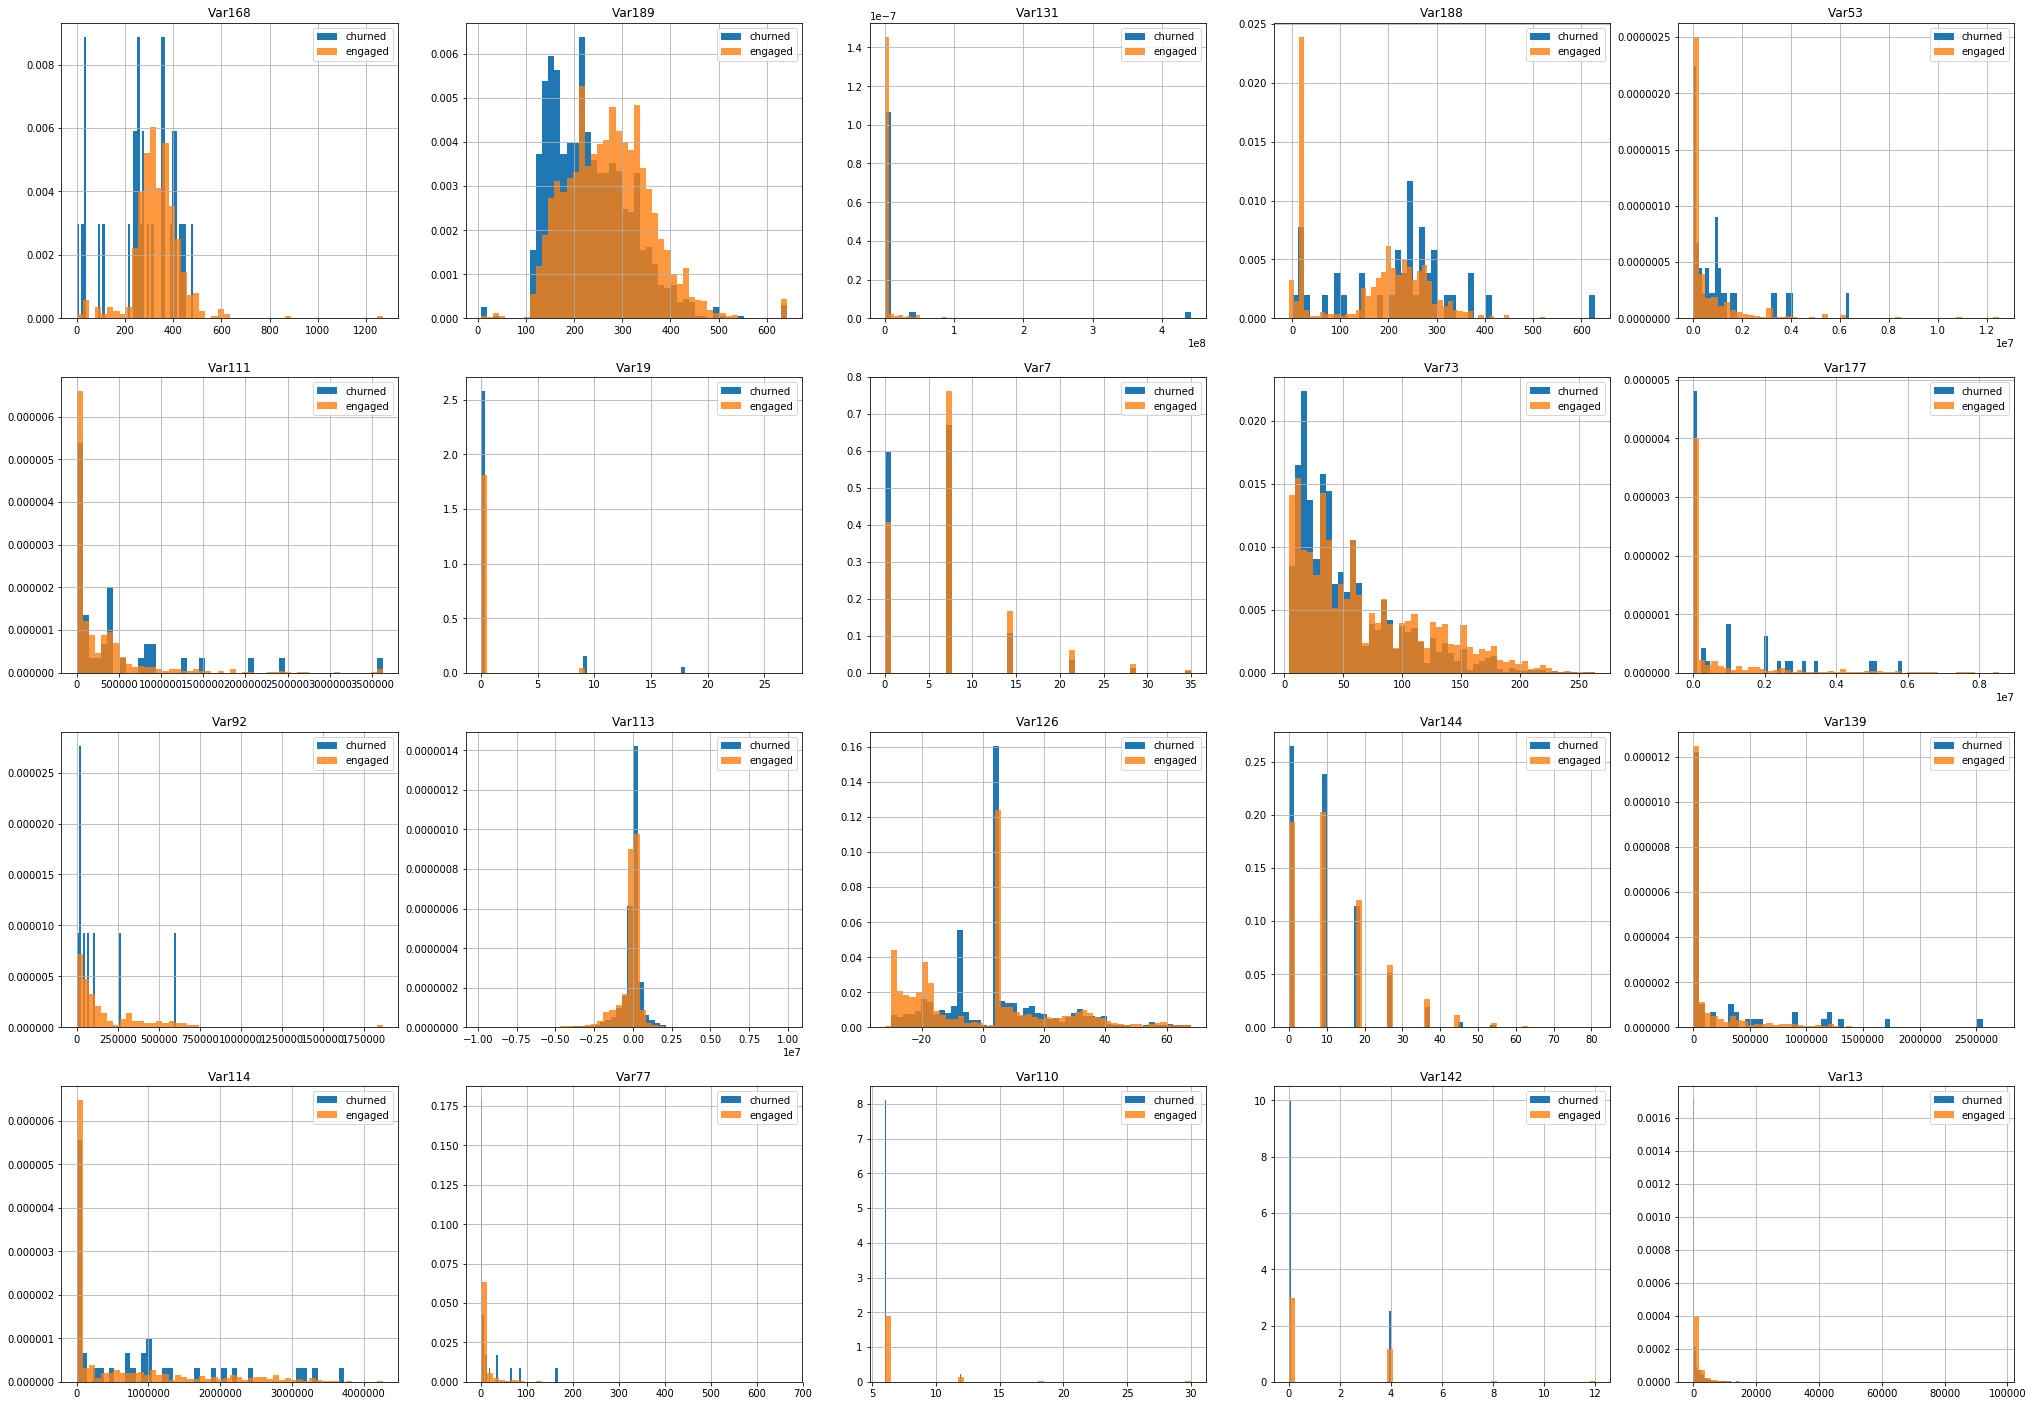

In [10]:
# Распределения в разрезе классов
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(35,25))
p_df = data_numbers_with_target[data_numbers_with_target.target==1]
n_df = data_numbers_with_target[data_numbers_with_target.target==0]

for i, col_name in enumerate(top_r_corr):
    ax = axs[i/5, i%5]
    p_df[col_name].hist(bins=50, normed=1, label='churned', ax=ax);
    n_df[col_name].hist(bins=50, normed=1, label='engaged', alpha=0.8, ax=ax);
    ax.legend()
    ax.set_title(col_name)

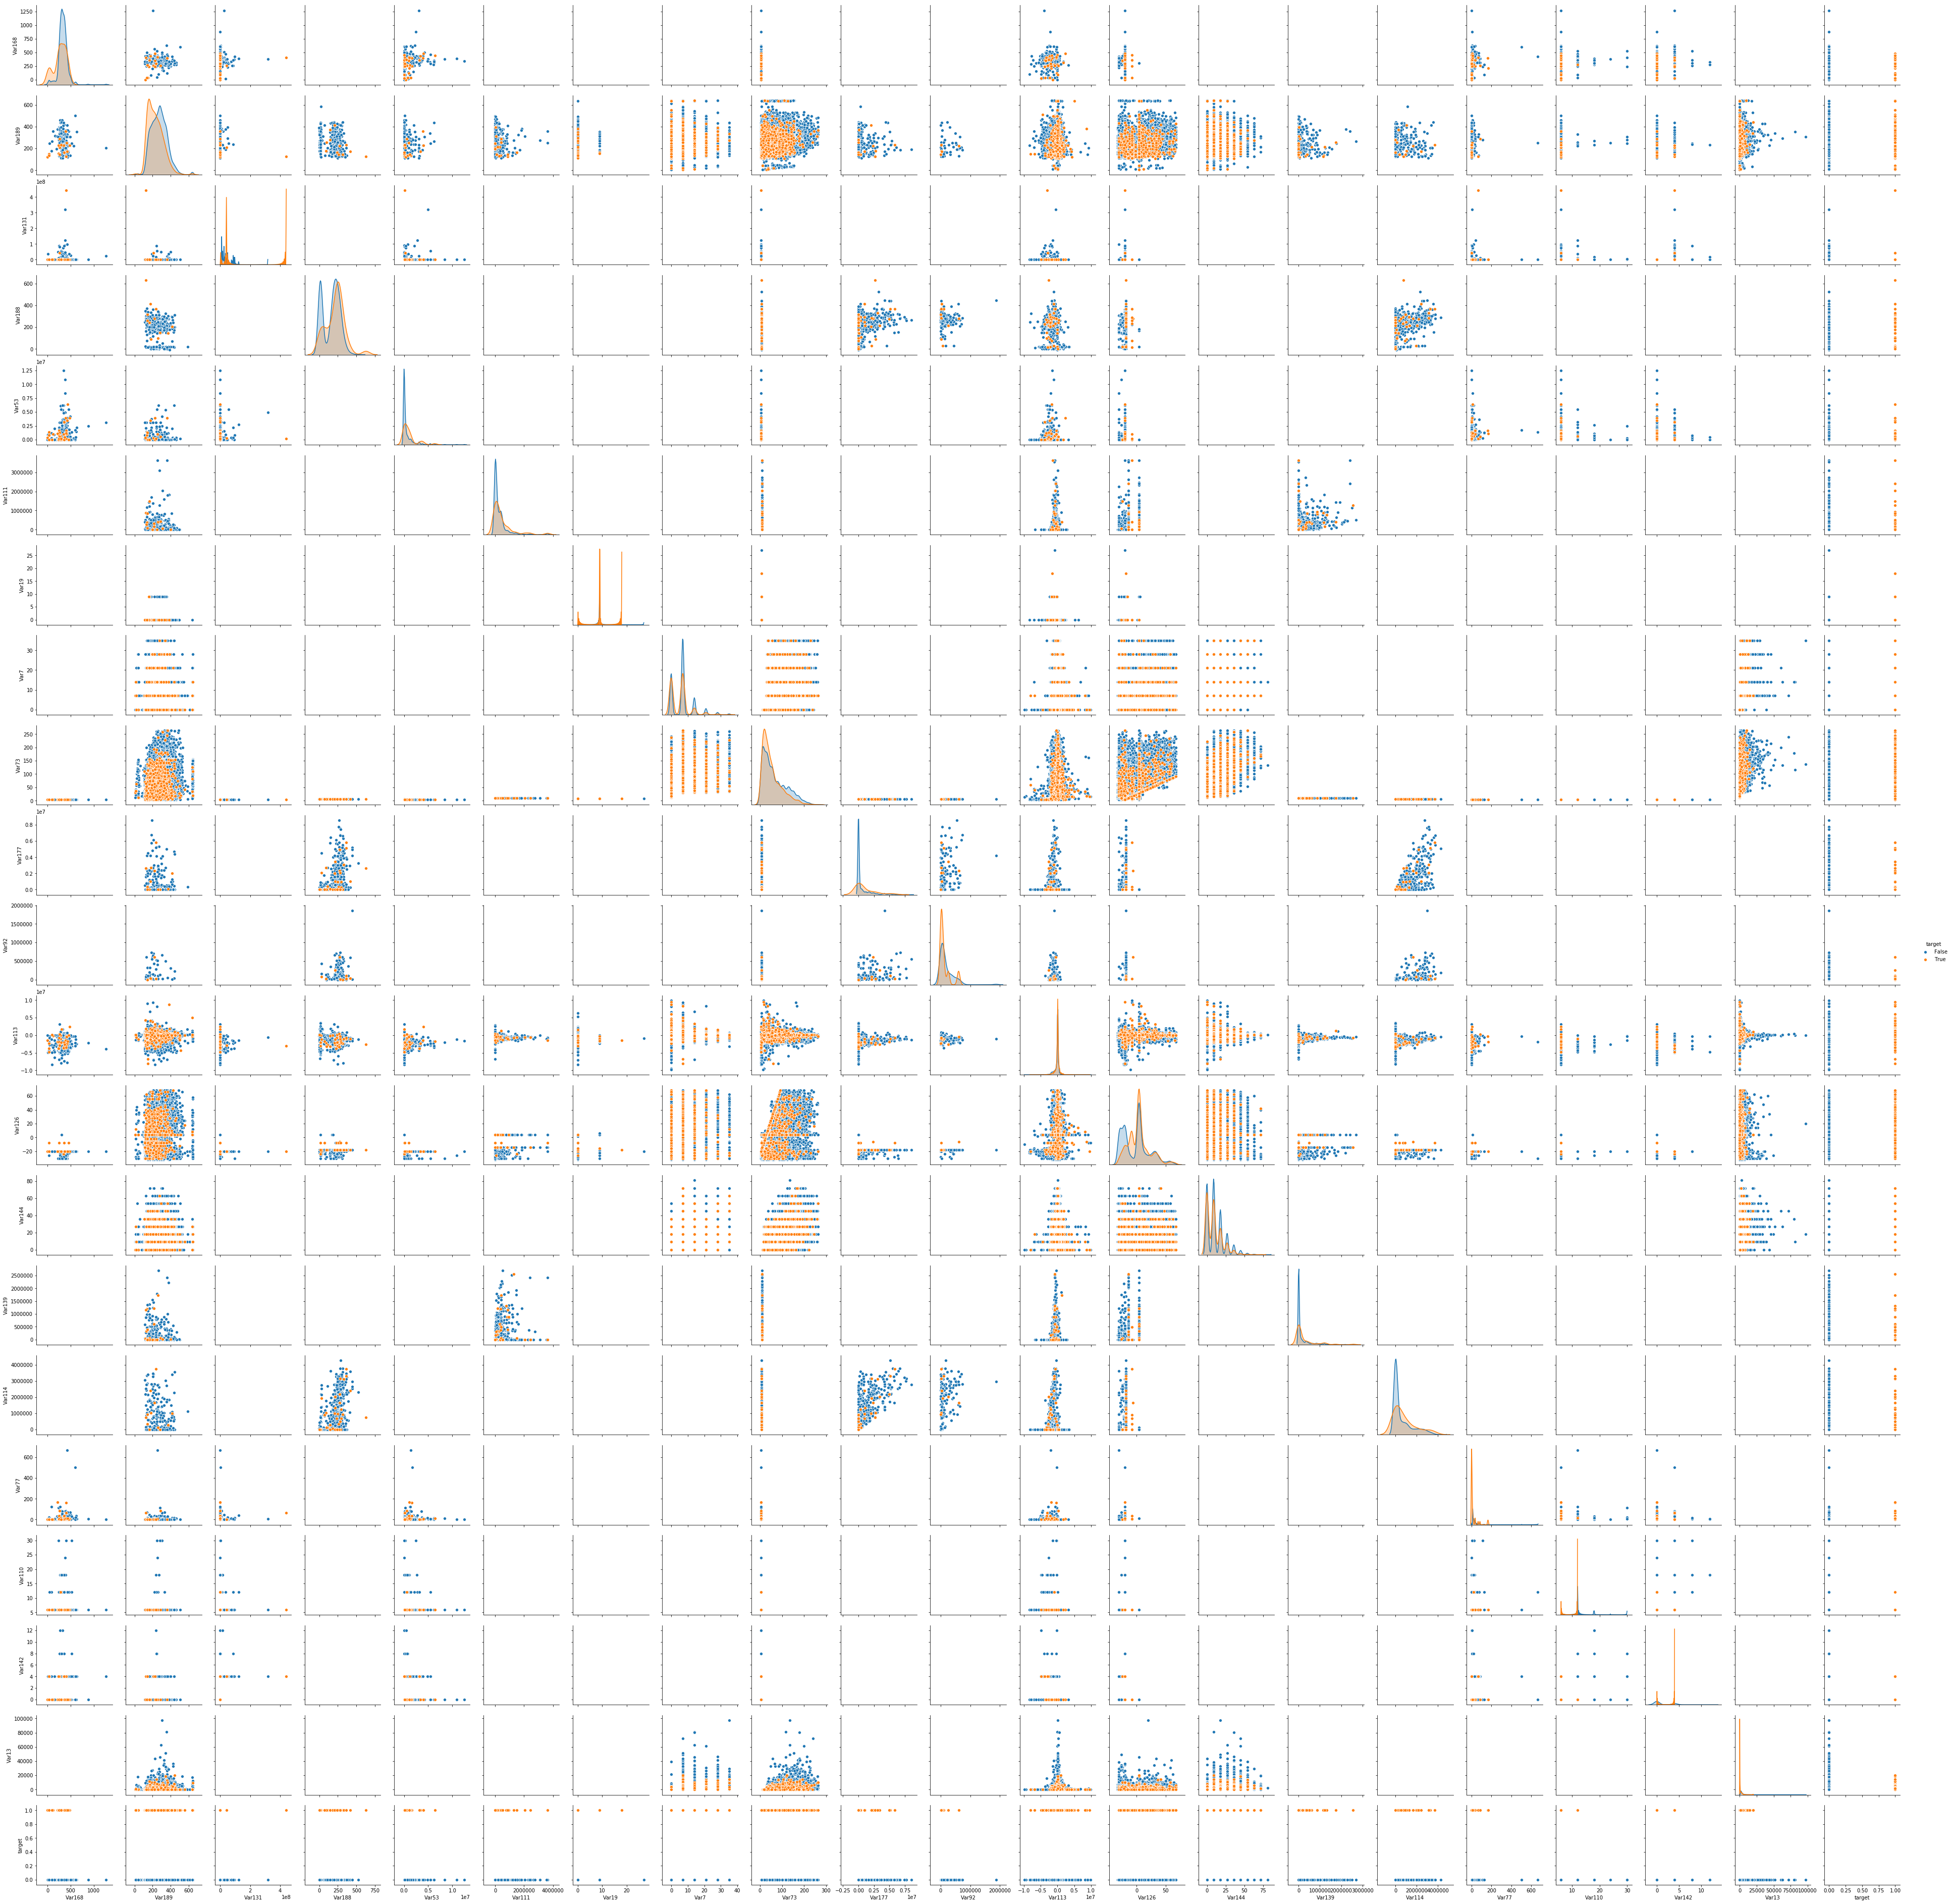

In [30]:
sns.pairplot(data_numbers_with_target[top_r_corr + ['target']], hue='target', dropna=1)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

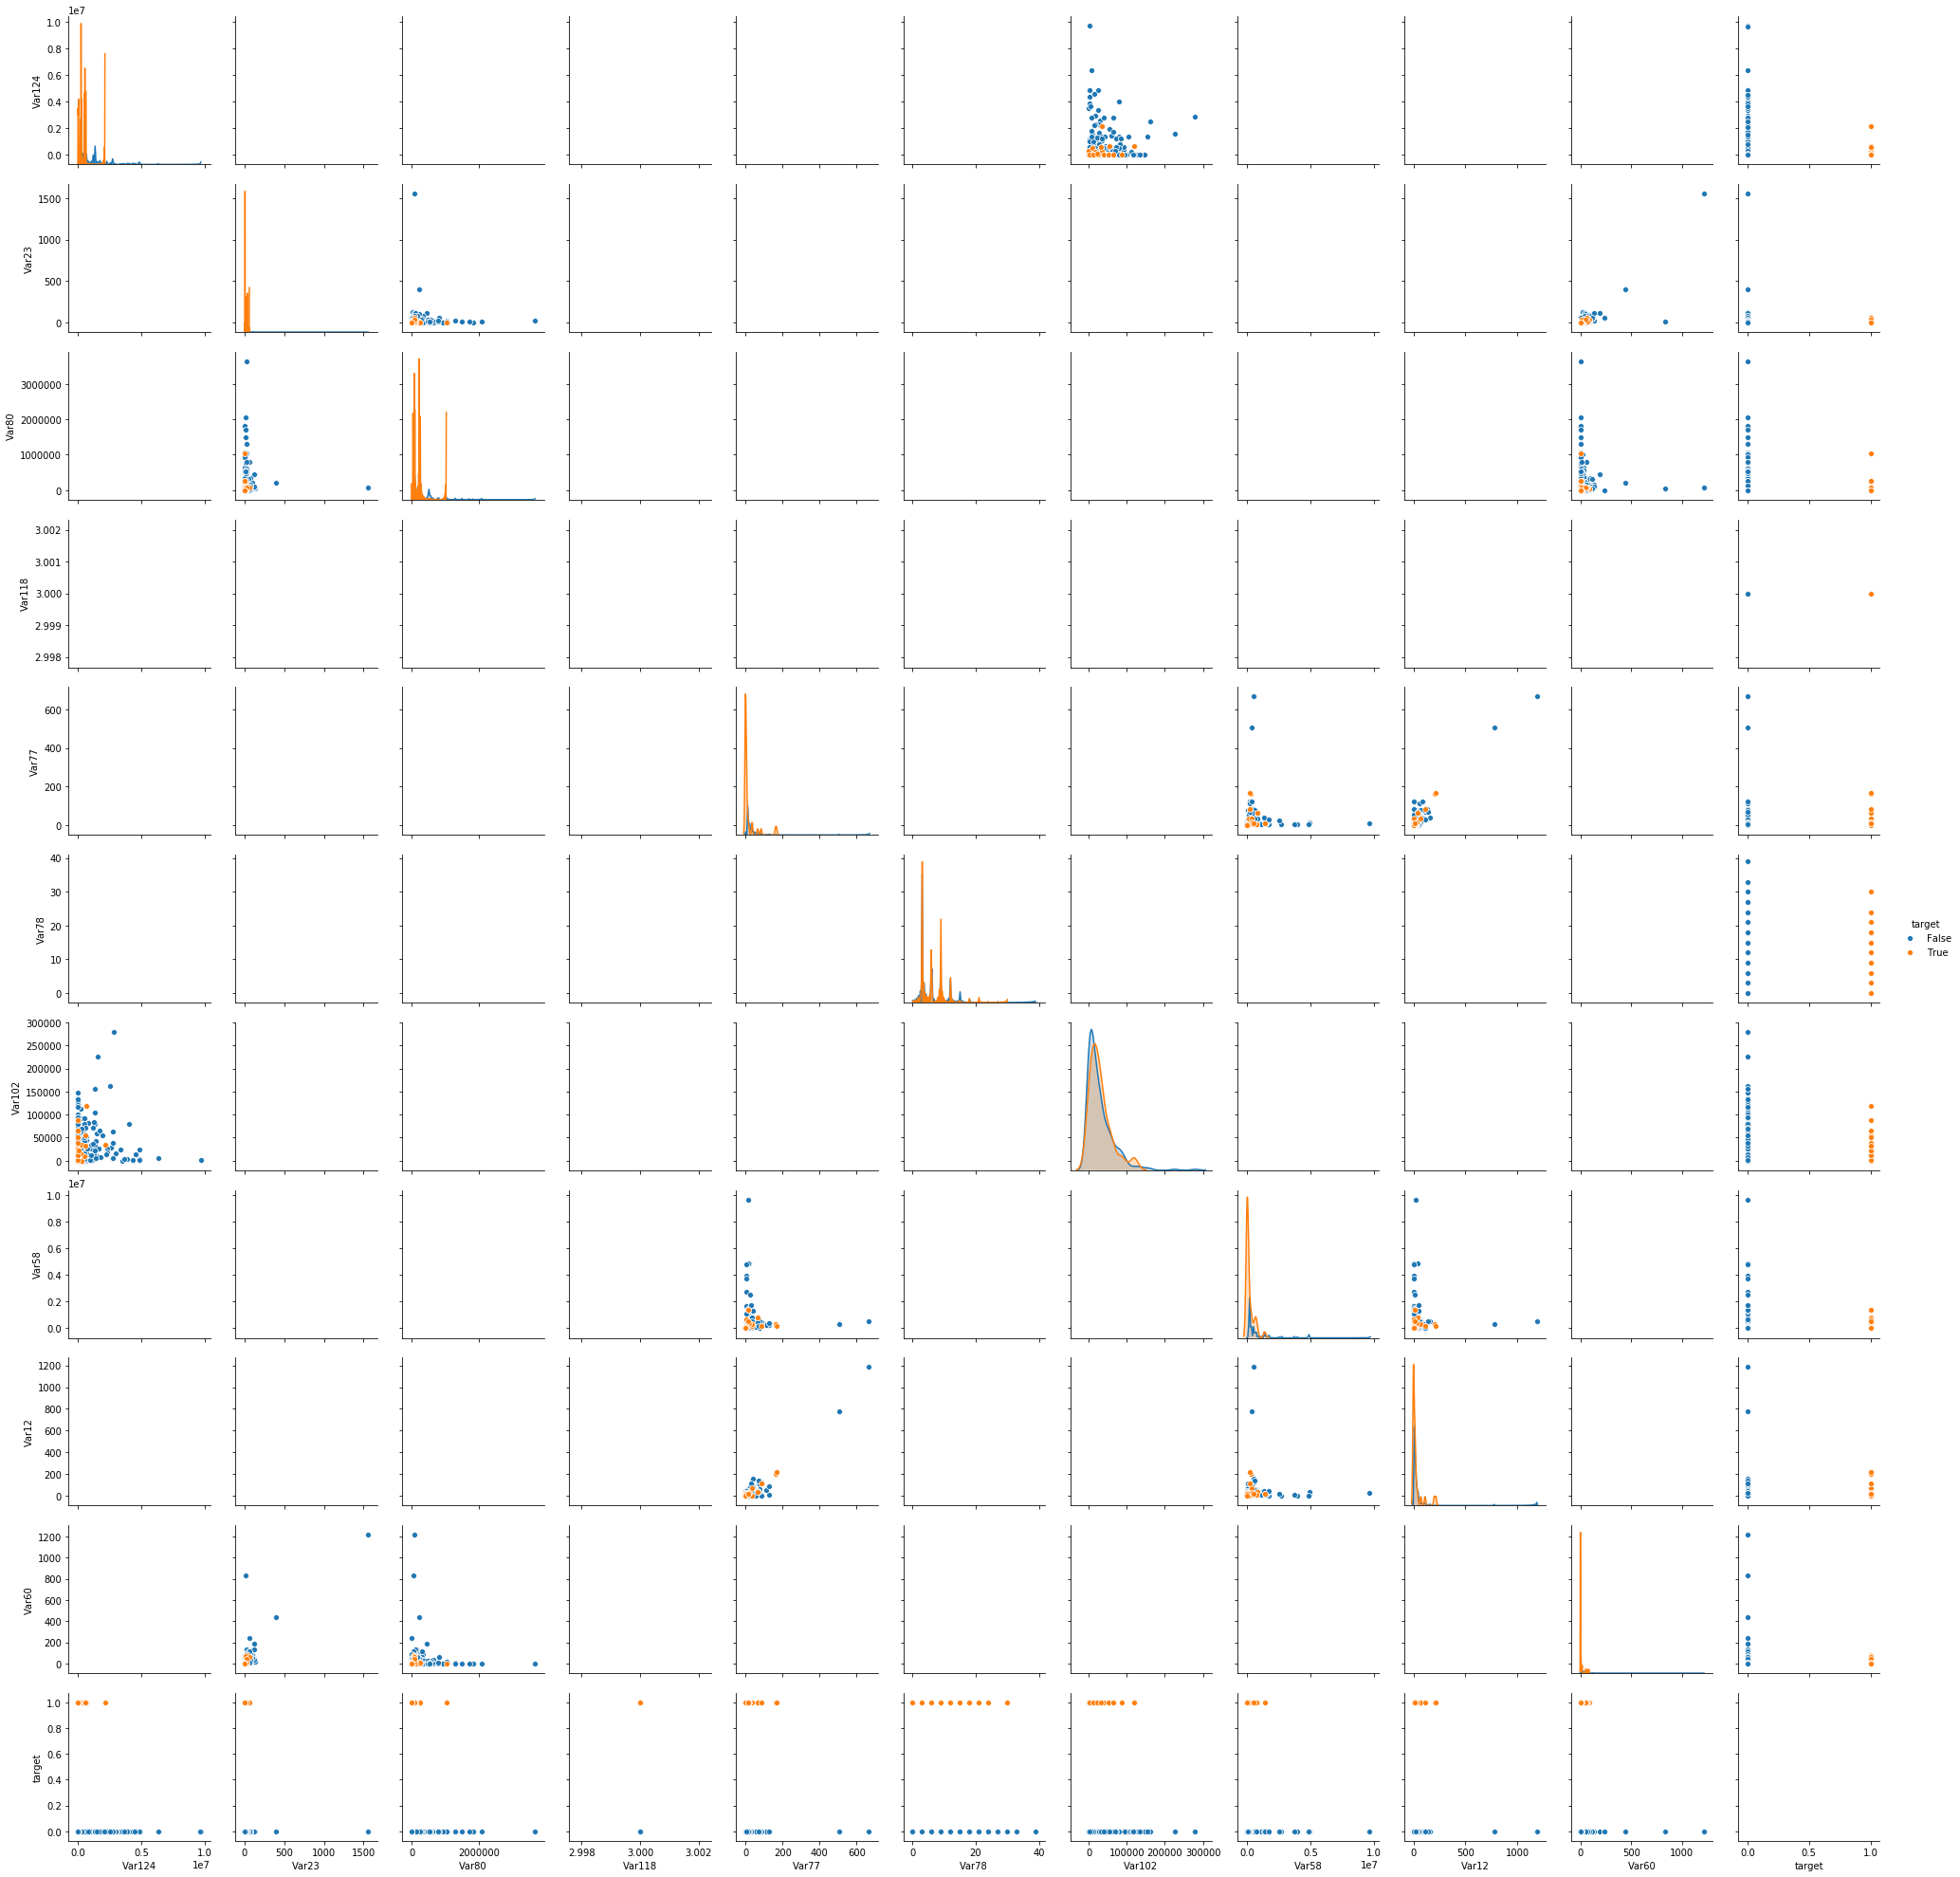

In [81]:
np.random.seed(10)
columns = list(np.random.choice(columns_numbers, 10, replace=False))
sns.pairplot(data_numbers_with_target[columns + ['target']], hue='target', dropna=1)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

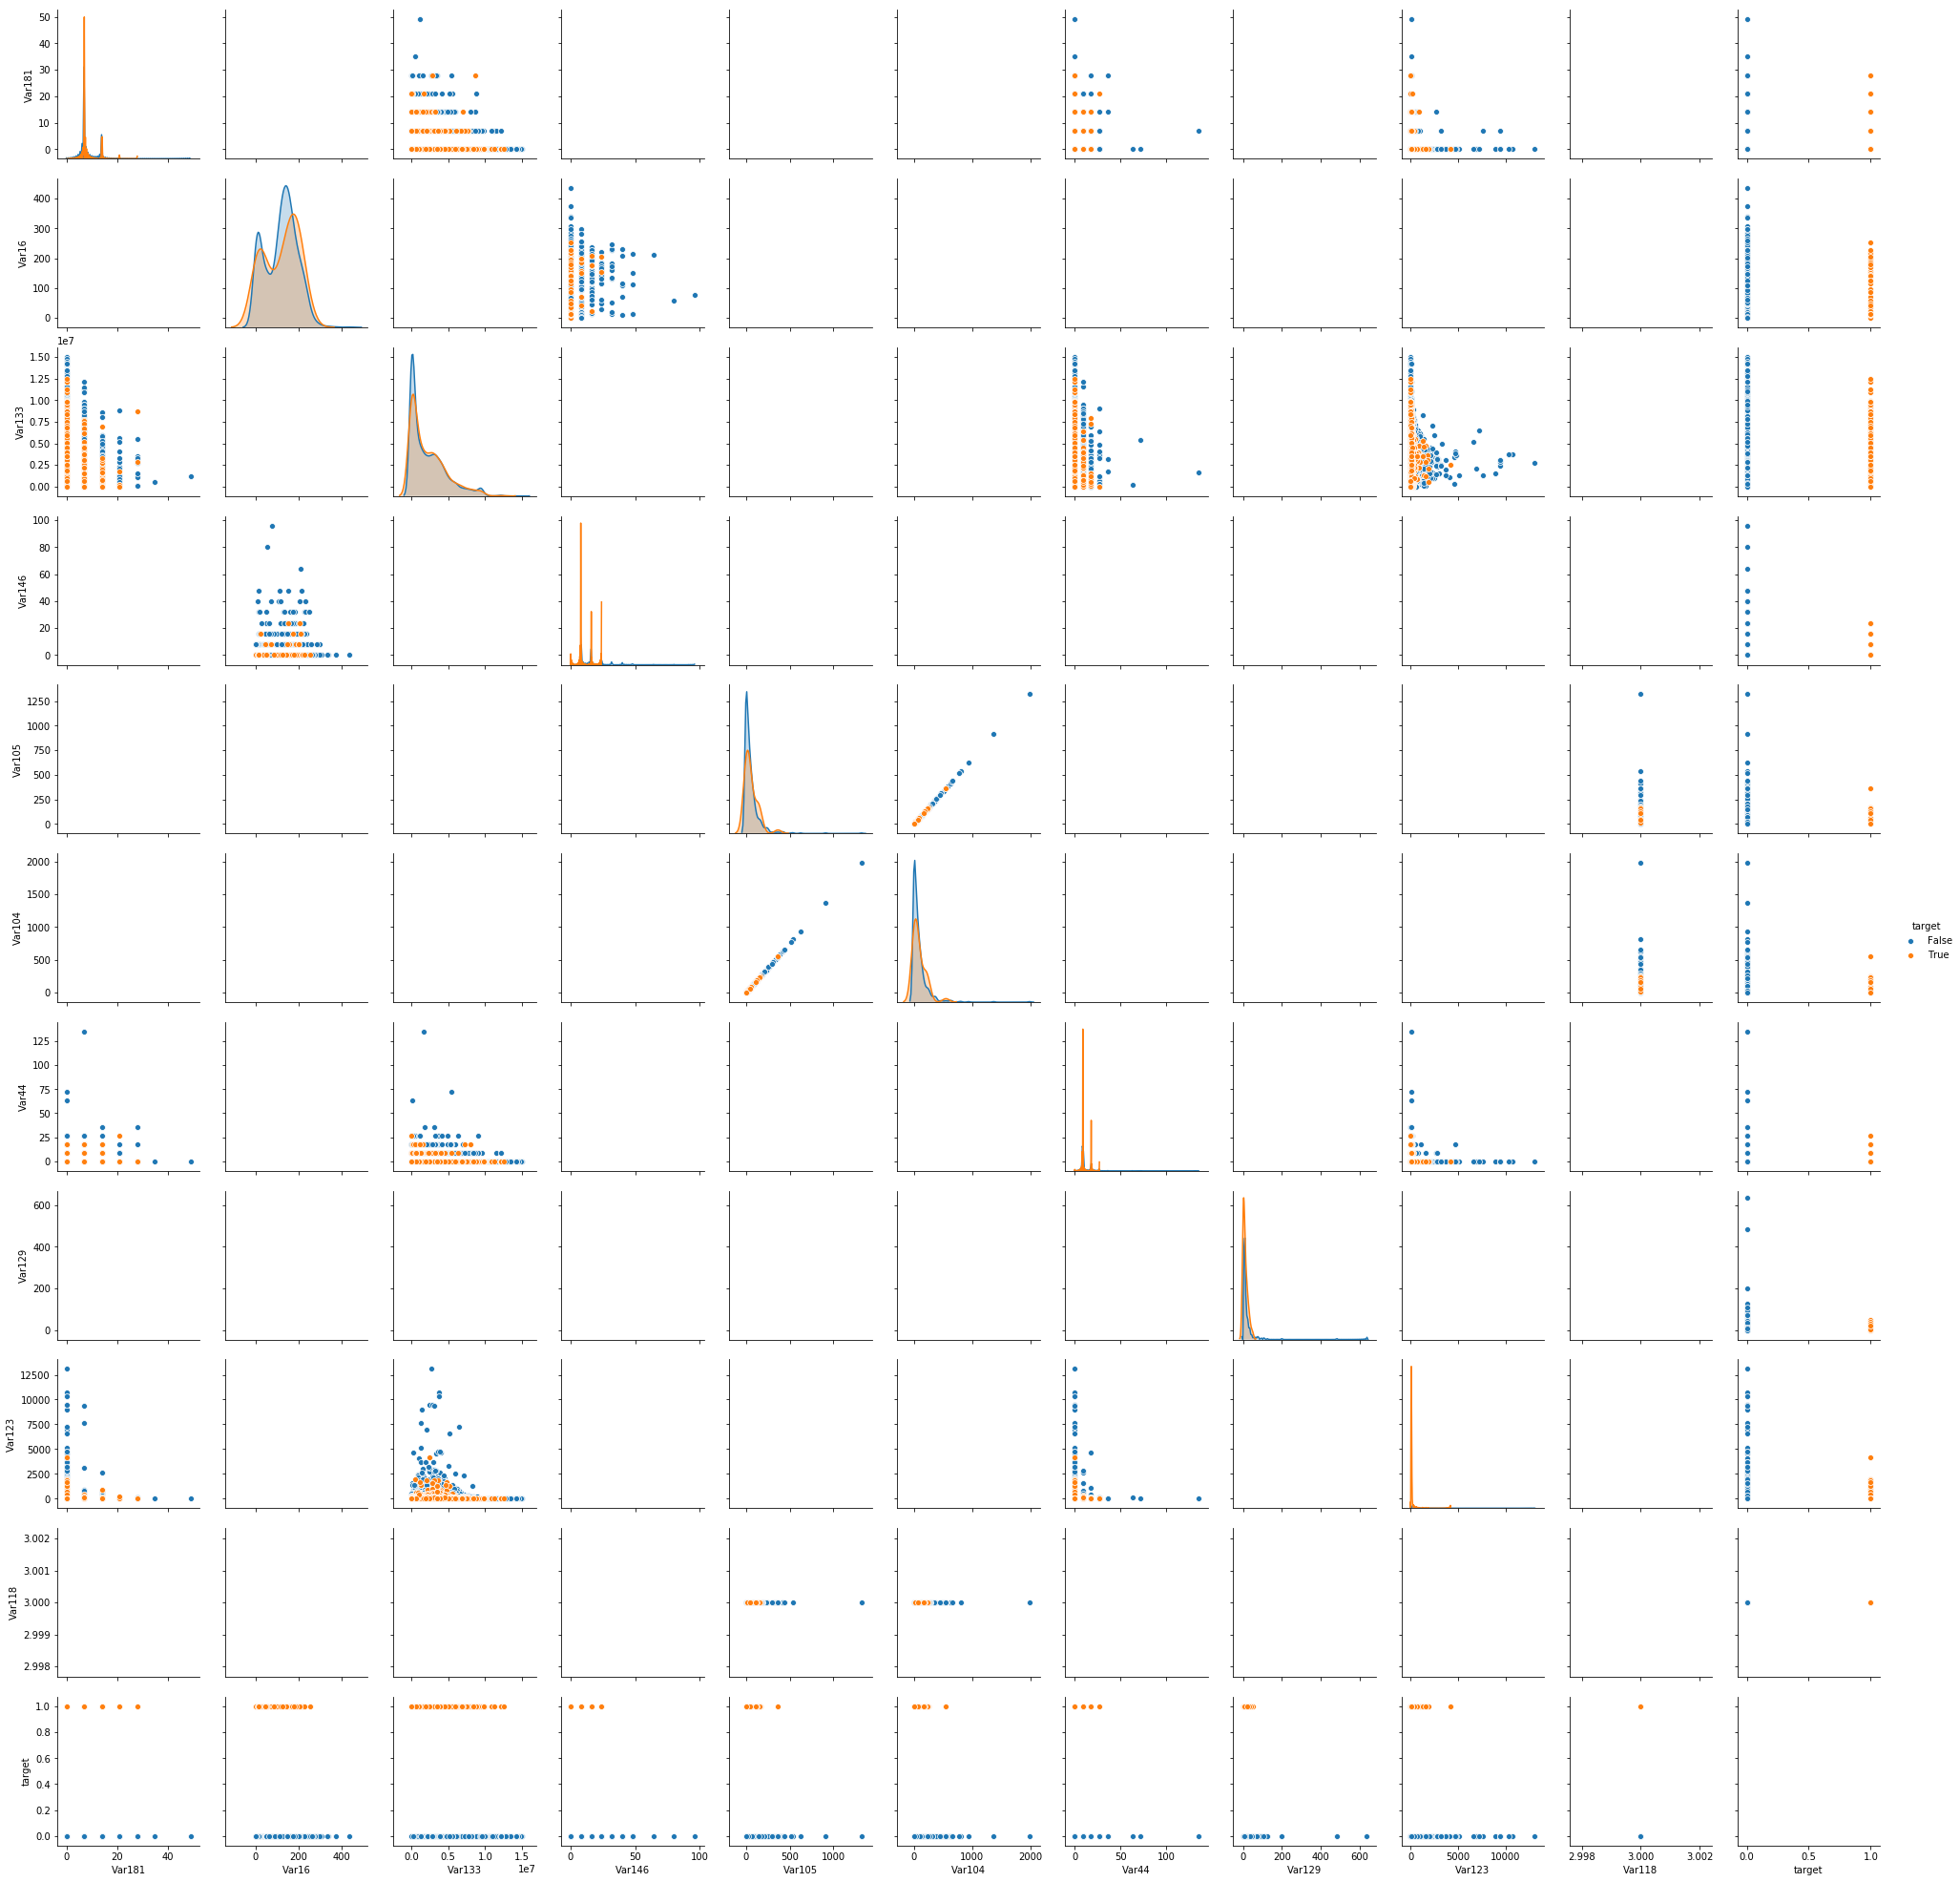

In [82]:
sns.pairplot(data_numbers_with_target[bottom_r_corr + ['target']], hue='target', dropna=1)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

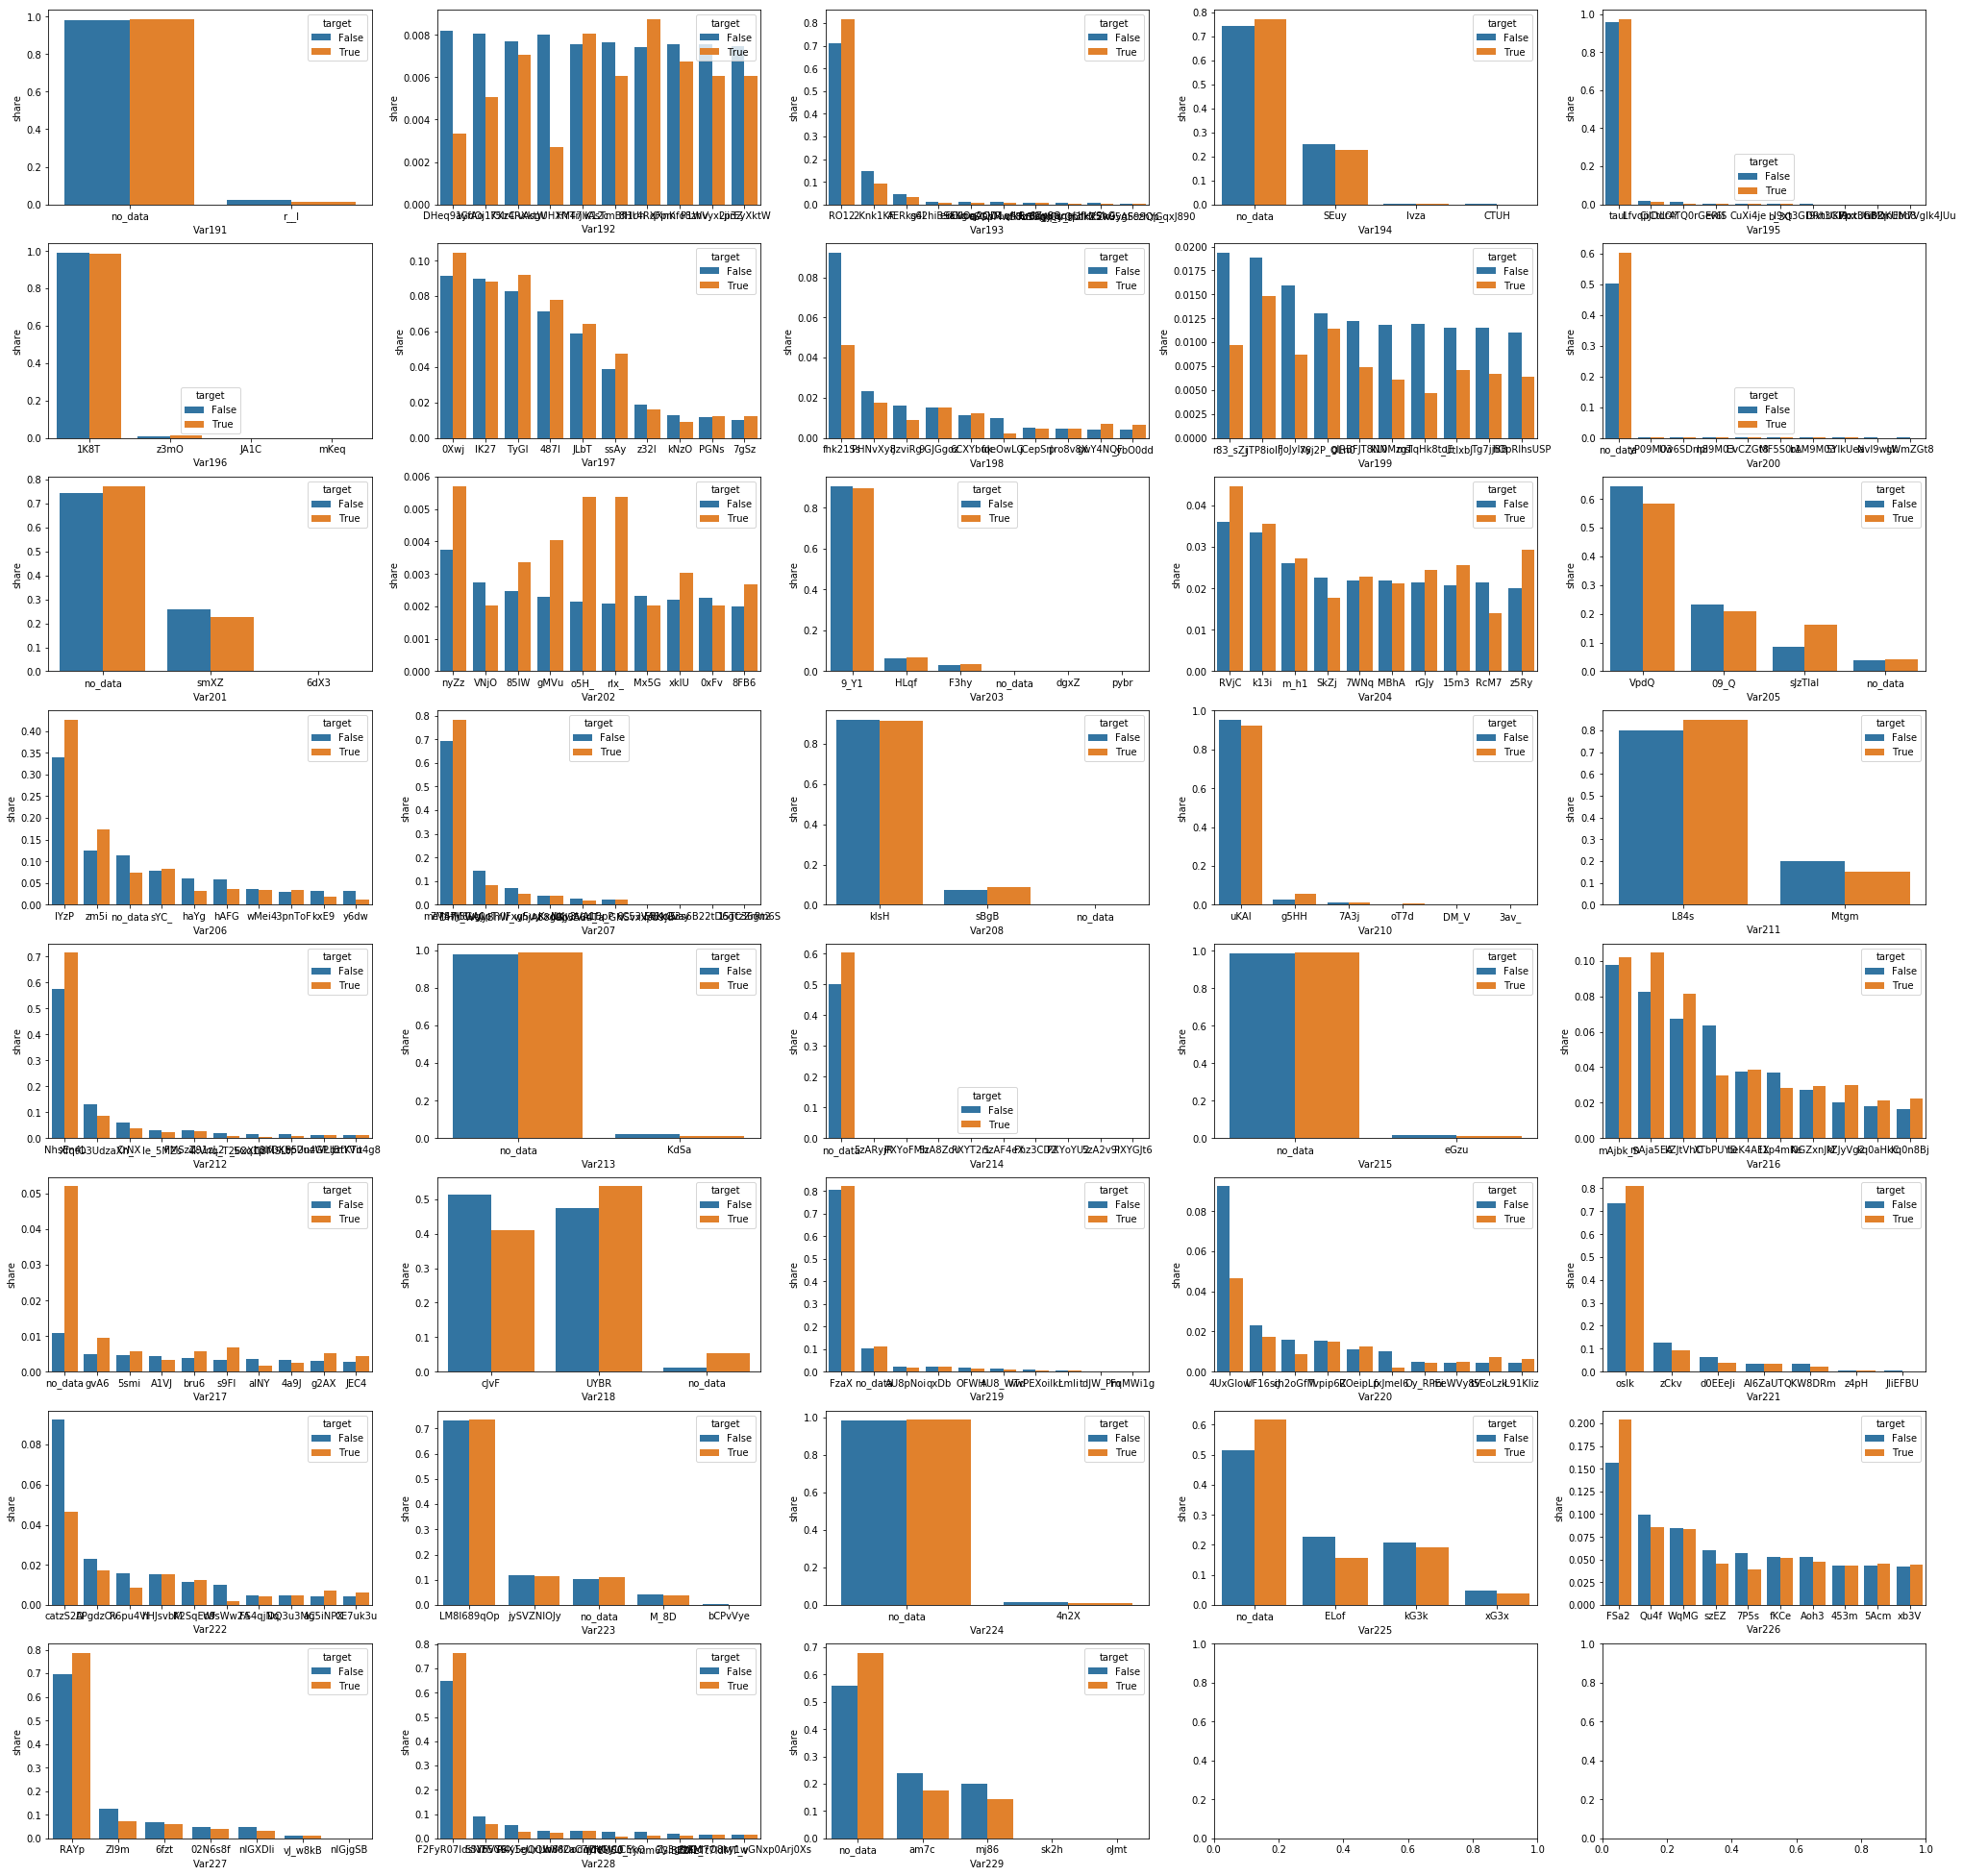

In [120]:
fig, axs = plt.subplots(ncols=5, nrows=8, figsize=(35,35))
df = data_cat_with_target.copy()

for i, col_name in enumerate(columns_cat):
    df[col_name] = df[col_name].fillna('no_data')
    values = df[col_name].value_counts()
    
    share_df = (df[col_name]
           .groupby(df['target'])
           .value_counts(normalize=True)
           .rename('share')
           .reset_index())
    
    sns.barplot(
            data=share_df,
            x=col_name,
            y='share',
            hue='target',
            order=values.iloc[:min(len(values), 10)].index,
            ax=axs[i/5, i%5])            


8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

- Датасет содержит "пустые" признаки - необходимо исключить 
- Датасет содержит много пропусков данных - необходимо будет решить, что с ними делать на этапе подготовки данных 
- Присутствует некоторое кол-во линейно зависимых признаков
- В данных много выбросов 
- На ряде числовых признаков прослеживается "разделение" распределения в зависимости от целевого признака: Var168, Var189 и т.д.
- Ряд числовых признаков содержащих малое кол-во уникальных значений, что ставит под сомнение их "полезность", особенно в виде 
  числовых признаков (можно конвертировать в категориальные): Var118, Var123 и т.д.
- Среди категориальных признаков, есть довольно хорошо "разделяющие":  Var192, Var198, Var199, Var220
- Отбор признаков может показать хорошие результаты
